In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
import random
def random_number_list(n):
    rand_list = []
    for _ in range(n):
        rand_list.append(random.randint(-1000, 1000))
    return rand_list

# create a merge helper function
def merge(arr, start, mid, end):
    comparisons = 0
    # Create temporary arrays
    left = arr[start:mid]
    right = arr[mid:end]
    
    # Merge back into the original array
    i = j = 0
    k = start
    
    
    while i < len(left) and j < len(right):
        comparisons += 2
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    comparisons += 1
    
    # Copy remaining elements if any
    while i < len(left):
        comparisons += 1
        arr[k] = left[i]
        i += 1
        k += 1
    comparisons += 1
        
    while j < len(right):
        comparisons += 1
        arr[k] = right[j]
        j += 1
        k += 1
    comparisons += 1
    return comparisons

def merge_sort(arr, start=0, end=None):
    comparisons = 0
    comparisons += 1
    if end is None:
        end = len(arr)
        
    # Base case: arrays with 0 or 1 elements are already sorted
    comparisons += 1
    if end - start <= 1:
        return comparisons
        
    # Find the middle point
    mid = (start + end) // 2
    
    # Sort first and second halves
    comparisons += merge_sort(arr, start, mid)
    comparisons += merge_sort(arr, mid, end)
    
    # Merge the sorted halves
    comparisons += merge(arr, start, mid, end)
    return comparisons


# making insertion sort
def insertion_sort(arr):
    comparisons = 0
    # 1. Iterate through each item in the array, starting with item at index 1 (i)
    for i in range(1, len(arr)): 
        # 2. set comparison index to i - 1 (comp)
        comp = i - 1
        # 3. while comparison index isn't 0, keep looping
        while comp >= 0:
            # if item is greater than item at comparison index, break from loop
            comparisons+=1
            if arr[i] > arr[comp]:
                break
        
            comp -=1
        # if comparison + 1 equals len(arr) - 1, return
        comparisons += 1
        if comp + 1 == len(arr) + 1:
            return 
        # set variable item to arr[i].pop
        item = arr.pop(i)
        # get a subarry from arr from indices comp + 1 to len(arr) - 1
        subArr = arr[comp + 1: len(arr)]
        # delete that subarray from arr
        del arr[comp + 1: len(arr) ]
        # arr = arr + [item] + subarray
        arr[comp+1:comp+1] = [item] + subArr
    return comparisons



In [3]:
max_list_size = 1000

In [4]:
#Testing insertion sort
comparisons = []
failed = False
for i in range(max_list_size):
    testList = random_number_list(i)
    comparisons.append(insertion_sort(testList))
    if (testList != sorted(testList)):
        failed = True
print(failed)

False


In [5]:
x_data = np.arange(len(comparisons))
coefficients = np.polyfit(x_data, comparisons, 2)

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = np.polyval(coefficients, x_fit)

<module 'matplotlib.pyplot' from '/Users/charlierothschild/miniforge3/envs/DSA/lib/python3.13/site-packages/matplotlib/pyplot.py'>

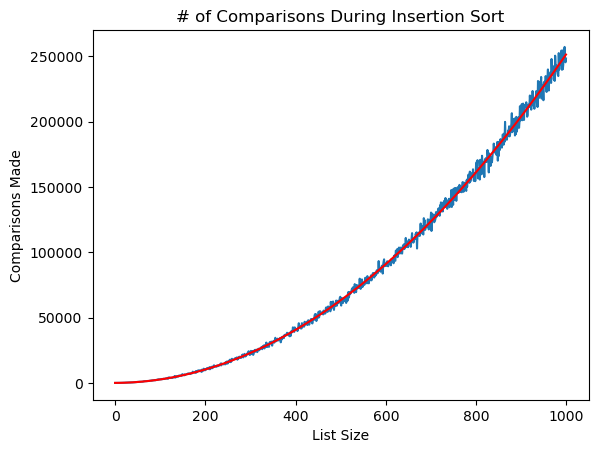

In [6]:
#insertion sort line graph
plt.plot(comparisons)
plt.plot(x_fit, y_fit, label='n^2 Fit', color='red')
plt.xlabel("List Size")
plt.ylabel("Comparisons Made")
plt.title("# of Comparisons During Insertion Sort")
plt

Based on this graph, it seems that the time complexity of the insertion sort has $O(n^2)$ time complexity, with the number of comparisons made increasing by about a power of two as the list gets bigger. The lines on the graph are somewhat jagged, indicating that a list of greater size doesn't necesarily mean more comparisons made - this indicates that some lists require fewer comparisons to sort, aligning with the O(n) best-case scenario time complexity we talked about in class.

In [7]:
#Testing merge sort
comparisons = []
failed = False
for i in range(max_list_size):
    testList = random_number_list(i)
    comparisons.append(merge_sort(testList))
    if (testList != sorted(testList)):
        failed = True
print(failed)

False


<module 'matplotlib.pyplot' from '/Users/charlierothschild/miniforge3/envs/DSA/lib/python3.13/site-packages/matplotlib/pyplot.py'>

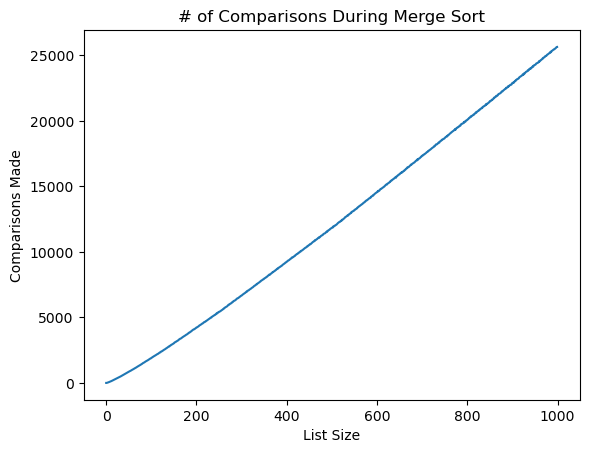

In [8]:
plt.plot(comparisons)
plt.xlabel("List Size")
plt.ylabel("Comparisons Made")
plt.title("# of Comparisons During Merge Sort")
plt

This graph indicates that merge sort yeilds a time complexity of O(nlogn), as the time complexity increases somewhere between a linear time complexity and an o(n^2) time complexity. Unlike the insertion sort graph, the merge sort graph yeilds a smooth line, indicating any randomly generated list of size n will yeild a constant number of comparisons.